In [ ]:
from torchvision.datasets import Cityscapes
from torch.utils.data import DataLoader, Dataset
from torchvision.models import segmentation
import torchvision.transforms as transforms
from glob import glob
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import torch
import torchvision
import torch.nn as nn
import os

from typing import Any, Callable, Dict, List, Optional, Union, Tuple

In [ ]:
!pip install -U segmentation-models-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 46.8 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=1841e5cfc39288064e0e2b3f710e162531ad7610622771844cbee4be81feff4f
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=507386c5b0a74c9d61c678b51ed0acee283757566c14c9d2de7e2b6c5ff716d6
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficientnet-pytorch pretrainedmodels


In [ ]:
import segmentation_models_pytorch as smp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image = Image.open('/content/drive/MyDrive/CV Bootcamp/Project-3/Dataset/annotations_prepped_train-20230811T065240Z-001/annotations_prepped_train/0001TP_006690.png').convert('RGB')

In [ ]:
type(image)

PIL.Image.Image

In [ ]:
transform = transforms.Compose([
    transforms.PILToTensor()
])

In [ ]:
image = transform(image)

In [ ]:
image.shape

torch.Size([3, 360, 480])

In [ ]:
image

tensor([[[ 1,  1,  1,  ...,  1,  1,  1],
         [ 1,  1,  1,  ...,  1,  1,  1],
         [ 1,  1,  1,  ...,  1,  1,  1],
         ...,
         [ 4,  4,  4,  ..., 11, 11, 11],
         [ 4,  4,  4,  ..., 11, 11, 11],
         [ 4,  4,  4,  ..., 11, 11, 11]],

        [[ 1,  1,  1,  ...,  1,  1,  1],
         [ 1,  1,  1,  ...,  1,  1,  1],
         [ 1,  1,  1,  ...,  1,  1,  1],
         ...,
         [ 4,  4,  4,  ..., 11, 11, 11],
         [ 4,  4,  4,  ..., 11, 11, 11],
         [ 4,  4,  4,  ..., 11, 11, 11]],

        [[ 1,  1,  1,  ...,  1,  1,  1],
         [ 1,  1,  1,  ...,  1,  1,  1],
         [ 1,  1,  1,  ...,  1,  1,  1],
         ...,
         [ 4,  4,  4,  ..., 11, 11, 11],
         [ 4,  4,  4,  ..., 11, 11, 11],
         [ 4,  4,  4,  ..., 11, 11, 11]]], dtype=torch.uint8)

In [ ]:
torch.max(image)

tensor(11, dtype=torch.uint8)

In [ ]:
destination_folder = '/content/drive/MyDrive/CV Bootcamp/Project-3/Dataset'

In [ ]:
train_img_path = os.path.join(destination_folder, 'images_prepped_train-20230811T065243Z-001', 'images_prepped_train')
train_annot_path = os.path.join(destination_folder, 'annotations_prepped_train-20230811T065240Z-001', 'annotations_prepped_train')

test_img_path = os.path.join(destination_folder, 'images_prepped_test-20230811T065241Z-001', 'images_prepped_test')
test_annot_path = os.path.join(destination_folder, 'annotations_prepped_test-20230811T065240Z-001', 'annotations_prepped_test')

In [ ]:

print(f'total train images: {len(os.listdir(train_img_path))}')
print(f'total train annots: {len(os.listdir(train_annot_path))}')
print(f'total test images: {len(os.listdir(test_img_path))}')
print(f'total test annots: {len(os.listdir(test_annot_path))}')

total train images: 367
total train annots: 367
total test images: 101
total test annots: 101


In [ ]:
def get_classes_annotations(annotation_folder):
    # Initialize an empty set to accumulate unique classes
    unique_classes_set = set()

    # Iterate through each file in the folder
    for filename in os.listdir(annotation_folder):
        if filename.endswith('.png'):  # Assuming images are in PNG format, adjust as needed
            # Load the annotation image
            annotation_path = os.path.join(annotation_folder, filename)
            annotation_image = Image.open(annotation_path)

            # Convert the image to a NumPy array
            annotation_array = np.array(annotation_image)

            # Add unique classes to the set
            unique_classes_set.update(np.unique(annotation_array))

    # Print the number of unique classes and the unique class values
    number_of_classes = len(unique_classes_set)
    unique_classes_values = sorted(list(unique_classes_set))

    print("Number of Unique Classes:", number_of_classes)
    print("Unique Class Values:", unique_classes_values)

In [ ]:
get_classes_annotations(train_annot_path)

Number of Unique Classes: 12
Unique Class Values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [ ]:
get_classes_annotations(test_annot_path)

Number of Unique Classes: 12
Unique Class Values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [ ]:
def get_image_no_annot(imgs_path, annots_path):
    paths = []
    for img_path in os.listdir(imgs_path):
        if img_path not in os.listdir(annots_path):
            paths.append(img_path)
    return paths

In [ ]:
no_annot_imgs = get_image_no_annot(train_img_path, train_annot_path)

In [ ]:
print(no_annot_imgs)

[]


In [ ]:
def remove_image_no_annot(imgs_path, no_annot_imgs):
    for img in no_annot_imgs:
        file_path = os.path.join(imgs_path, img)
        if os.path.exists(file_path):
            os.remove(file_path)
            print(f"File at {file_path} has been removed.")
        else:
            print(f"File at {file_path} does not exist.")

In [ ]:
remove_image_no_annot(train_img_path, no_annot_imgs)

In [ ]:
print(f'total train images: {len(os.listdir(train_img_path))}')
print(f'total train annots: {len(os.listdir(train_annot_path))}')
print(f'total test images: {len(os.listdir(test_img_path))}')
print(f'total test annots: {len(os.listdir(test_annot_path))}')

total train images: 367
total train annots: 367
total test images: 101
total test annots: 101


In [ ]:
destination_folder = '/content/drive/MyDrive/CV Bootcamp/Project-3/Dataset'
train_img_path = os.path.join(destination_folder, 'images_prepped_train-20230811T065243Z-001', 'images_prepped_train', '*')
train_annot_path = os.path.join(destination_folder, 'annotations_prepped_train-20230811T065240Z-001', 'annotations_prepped_train', '*')

test_img_path = os.path.join(destination_folder, 'images_prepped_test-20230811T065241Z-001', 'images_prepped_test', '*')
test_annot_path = os.path.join(destination_folder, 'annotations_prepped_test-20230811T065240Z-001', 'annotations_prepped_test', '*')

In [ ]:
list_img = glob(train_img_path)
# [s.find('0016E5_00630.png') for s in list_img]
filter_object = filter(lambda a: '0016E5_00630.png' in a, list_img)
print(list(filter_object))

['/content/drive/MyDrive/CV Bootcamp/Project-3/Dataset/images_prepped_train-20230811T065243Z-001/images_prepped_train/0016E5_00630.png']


In [ ]:
class MyDataset(Dataset):

    def __init__(self, images_path, labels_path, transform_img=None ,transform_label=None):

        self.images_path = images_path
        self.labels_path = labels_path
        self.transform_img = transform_img
        self.transform_label = transform_label

    def __len__(self):
        return len(self.images_path)

    def __getitem__(self, idx):
        image = Image.open(self.images_path[idx])
        img_name = os.path.basename(self.images_path[idx])

        filter_object = filter(lambda a: img_name in a, self.labels_path)
        # label = Image.open(list(filter_object)[0]).convert('RGB')
        label = Image.open(list(filter_object)[0])

        if self.transform_img:
            image = self.transform_img(image)

        if self.transform_label:
            label = self.transform_label(label)

        return image, (torch.squeeze(label)).long()

In [ ]:
image_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

label_transform = transforms.Compose([
    transforms.PILToTensor()
])

In [ ]:
train_dataset = MyDataset(glob(train_img_path), glob(train_annot_path), image_transform, label_transform)

In [ ]:
image, label = train_dataset[0]
image.shape, label.shape

(torch.Size([3, 360, 480]), torch.Size([360, 480]))

In [ ]:
class FCN8(nn.Module):
    def __init__(self, num_classes):
        super(FCN8, self).__init__()
        # Instantiate FCN8 model from torchvision
        self.fcn8 = segmentation.fcn_resnet50(weights=None, num_classes=num_classes, weights_backbone=torchvision.models.ResNet50_Weights.DEFAULT)

    def forward(self, x):
        return self.fcn8(x)['out']

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

In [ ]:
fcn_model = FCN8(num_classes=12).to(device)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 113MB/s]


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(fcn_model.parameters(), lr=0.001)

In [ ]:
train_loss = []

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    trainloss = 0
    valloss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = fcn_model(images)
        # print(outputs.shape)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        trainloss+=loss.item()

    train_loss.append(trainloss/len(train_loader))
    print("epoch : {} ,train loss : {} ".format(epoch,train_loss[-1]))


epoch : 0 ,train loss : 1.5180940483899221 
epoch : 1 ,train loss : 0.8502898650324863 
epoch : 2 ,train loss : 0.6921697284864343 
epoch : 3 ,train loss : 0.5690185187951379 
epoch : 4 ,train loss : 0.5018945909712625 
epoch : 5 ,train loss : 0.4412136939556702 
epoch : 6 ,train loss : 0.3963406312724818 
epoch : 7 ,train loss : 0.424176918261725 
epoch : 8 ,train loss : 0.4048088797084663 
epoch : 9 ,train loss : 0.3270351983930754 
epoch : 10 ,train loss : 0.29630029460658197 
epoch : 11 ,train loss : 0.2866893319979958 
epoch : 12 ,train loss : 0.2593749583415363 
epoch : 13 ,train loss : 0.23269445060387903 
epoch : 14 ,train loss : 0.2084323383219864 
epoch : 15 ,train loss : 0.19557591017497622 
epoch : 16 ,train loss : 0.18796624348539373 
epoch : 17 ,train loss : 0.1797873285477576 
epoch : 18 ,train loss : 0.16484267904382685 
epoch : 19 ,train loss : 0.14776170375230518 
epoch : 20 ,train loss : 0.1329590036007373 
epoch : 21 ,train loss : 0.12527017562609652 
epoch : 22 ,tr

KeyboardInterrupt: ignored

In [ ]:
torch.save(fcn_model.state_dict(), '/content/drive/MyDrive/CV Bootcamp/Project-3/model_fcn_1.pt')

In [ ]:
fcn_model.load_state_dict(torch.load('/content/drive/MyDrive/CV Bootcamp/Project-3/model_fcn.pt'))

<All keys matched successfully>

In [ ]:
fcn_model.eval()

FCN8(
  (fcn8): FCN(
    (backbone): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(

In [ ]:
test_dataset = MyDataset(glob(test_img_path), glob(test_annot_path), image_transform, label_transform)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=True)

In [ ]:
def multi_acc(pred, label):
    _, tags = torch.max(pred, dim = 1)
    corrects = (tags == label).float()
    acc = corrects.sum() / corrects.numel()
    acc = acc * 100
    return acc

In [ ]:
diceloss = smp.losses.DiceLoss('multiclass')
trainloss = 0
acc = 0
dloss = 0
iou = 0

for images, labels in test_loader:
  images, labels = images.to(device), labels.to(device)

  # Forward pass
  with torch.no_grad():
    outputs = fcn_model(images)

  # Compute loss
  loss = criterion(outputs, labels)


  dloss += diceloss(outputs, labels)
  acc += multi_acc(outputs, labels)

  trainloss+=loss.item()

  preds = torch.argmax(outputs, dim=1)
  tp, fp, fn, tn = smp.metrics.get_stats(preds, labels, mode='multilabel', threshold=0.5)
  iou_score = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro")
  # accuracy = smp.metrics.accuracy(tp, fp, fn, tn, reduction="macro")
  iou += iou_score
  # acc += accuracy

print(acc)
print("train loss : {0}, accuracy : {1}, dice loss : {2}, iou : {3} ".format(trainloss/len(test_loader), acc/len(test_loader), dloss/len(test_loader), iou/len(test_loader)))

tensor(2423.8257, device='cuda:0')
train loss : 0.2773830678600531, accuracy : 93.22406768798828, dice loss : 0.23977988958358765, iou : 0.9933521151542664 


In [ ]:
cityscapes_classes = [
    'Unlabeled', 'Road', 'Sidewalk', 'Building', 'Wall', 'Fence', 'Pole',
    'Traffic Light', 'Traffic Sign', 'Vegetation', 'Terrain', 'Sky', 'Person',
    'Rider', 'Car', 'Truck', 'Bus', 'Train', 'Motorcycle', 'Bicycle',
    'Void', 'Caravan', 'Trailer', 'Train', 'Tram', 'Truck', 'Van', 'Others',
    'Building_Pole', 'Traffic Sign Pole', 'Traffic Light Pole'
]

In [ ]:
diceloss = smp.losses.DiceLoss('multiclass')

images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
with torch.no_grad():
  preds = fcn_model(images)



print(diceloss(preds, labels))
print(multi_acc(preds, labels))
print(preds.shape)
preds = torch.argmax(preds, dim=1)
print(preds.shape)
tp, fp, fn, tn = smp.metrics.get_stats(preds, labels, mode='multilabel', threshold=0.5)
iou_score = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro")
print(iou_score)

tensor(0.2297, device='cuda:0')
tensor(92.7614, device='cuda:0')
torch.Size([4, 12, 360, 480])
torch.Size([4, 360, 480])
tensor(0.9934, device='cuda:0')


In [ ]:
images.shape

torch.Size([4, 3, 360, 480])

In [ ]:
inverse_transform = transforms.Compose([
    transforms.Normalize((-0.5/0.5, -0.5/0.5, -0.5/0.5), (1/0.5, 1/0.5, 1/0.5))
])

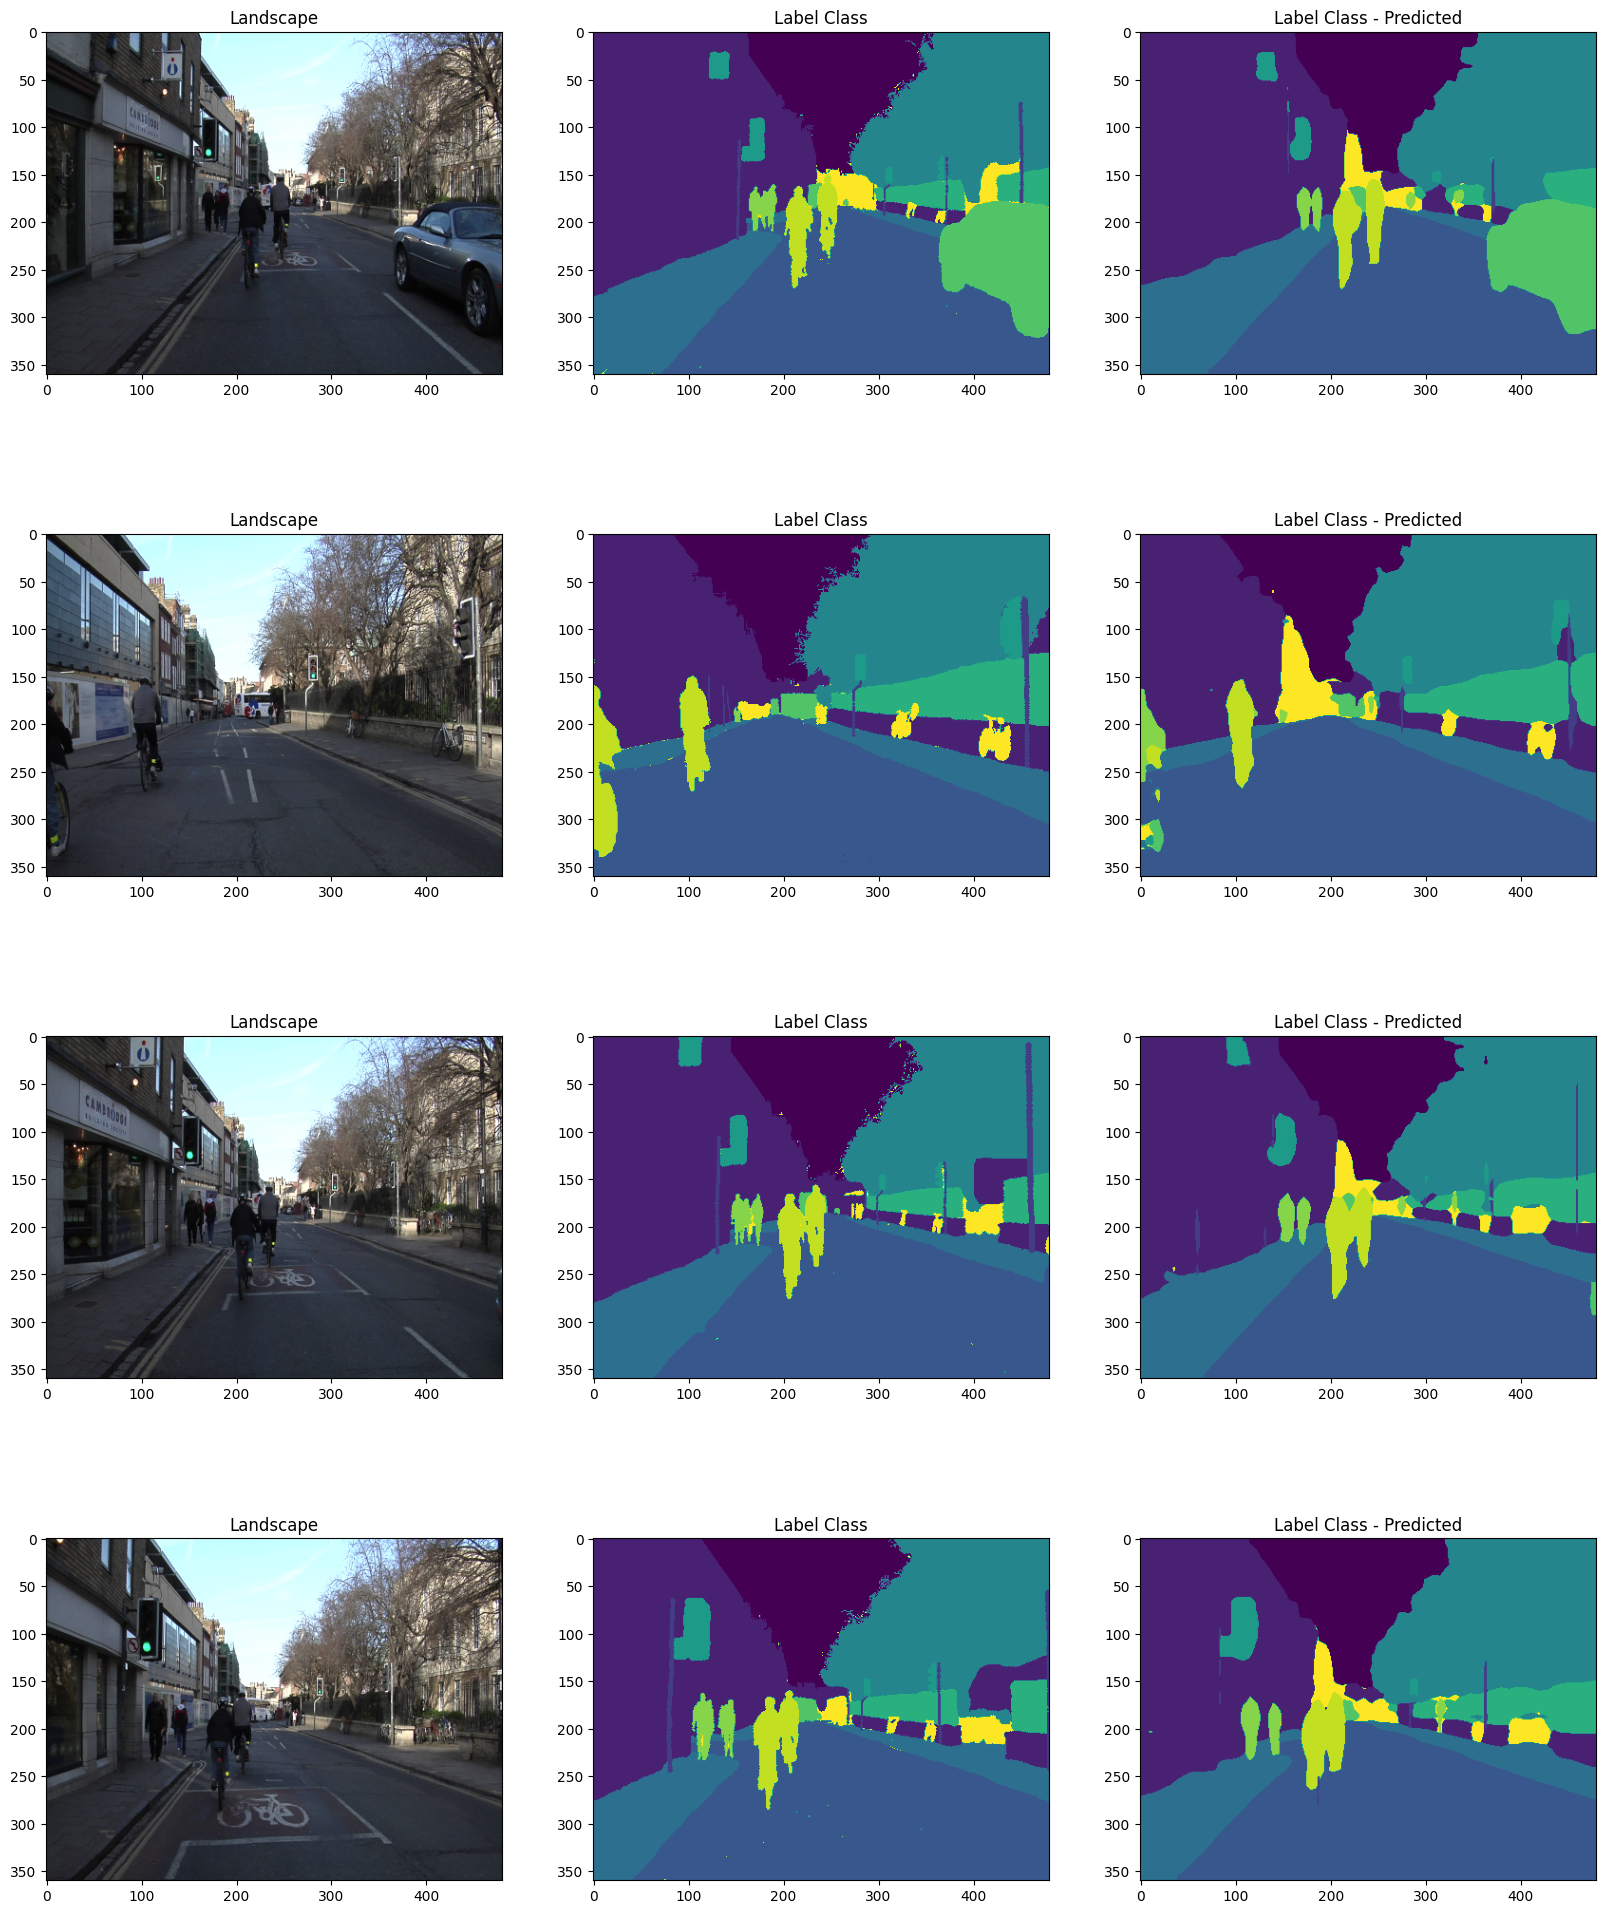

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(4*5, 5*5))
i=0
for i in range(4):

    landscape = inverse_transform(images[i]).permute(1, 2, 0).cpu().detach().numpy()
    label_class = labels[i].cpu().detach().numpy()
    label_class_predicted = preds[i].cpu().detach().numpy()

    axes[i, 0].imshow(landscape)
    axes[i, 0].set_title("Landscape")
    axes[i, 1].imshow(label_class)
    axes[i, 1].set_title("Label Class")
    axes[i, 2].imshow(label_class_predicted)
    axes[i, 2].set_title("Label Class - Predicted")

In [ ]:
import cv2

In [ ]:
video_path = '/content/traffic2.mp4'

In [ ]:
cap = cv2.VideoCapture(video_path)

In [ ]:
width = int(cap.get(3))
height = int(cap.get(4))
fps = cap.get(5)

In [ ]:
width, height, fps

(640, 360, 29.97002997002997)

In [ ]:
out = cv2.VideoWriter('segmentation_output.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (width, height))

In [ ]:
import random

# Function to generate random RGB colors
def generate_random_rgb():
    return tuple(random.randint(0, 255) for _ in range(3))

# Generate 12 random colors
random_colors = [generate_random_rgb() for _ in range(12)]

# Print the generated colors
print("Random Colors (RGB format):")
for i, color in enumerate(random_colors, 1):
    print(f"Color {i}: RGB{color}")

Random Colors (RGB format):
Color 1: RGB(231, 152, 67)
Color 2: RGB(99, 114, 97)
Color 3: RGB(166, 211, 239)
Color 4: RGB(192, 65, 50)
Color 5: RGB(153, 117, 47)
Color 6: RGB(210, 165, 80)
Color 7: RGB(20, 74, 152)
Color 8: RGB(151, 51, 137)
Color 9: RGB(105, 69, 112)
Color 10: RGB(6, 89, 86)
Color 11: RGB(98, 148, 225)
Color 12: RGB(36, 13, 66)


In [ ]:
ret, frame = cap.read()


# Convert the frame to a PIL image
pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Apply transformation
input_tensor = image_transform(pil_image)
input_batch = input_tensor.unsqueeze(0).to(device)


# Perform inference
with torch.no_grad():
    output = fcn_model(input_batch)

# Post-process the segmentation mask
output_predictions = torch.argmax(output, dim=1).cpu().numpy()

output_predictions.squeeze()

# Create a binary mask
# segmentation_mask = np.zeros_like(output_predictions, dtype=np.uint8)
# segmentation_mask[output_predictions == 13] = 255  # Assuming class 15 corresponds to the object of interest

# segmentation_mask[output_predictions == 13]


# Apply the mask to the original frame
# segmented_frame = cv2.bitwise_and(frame, frame, mask=segmentation_mask)


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]])

In [ ]:
color_mapping = {
    0: [231, 152, 67],
    1: [99, 114, 97],
    2: [166, 211, 239],
    3: [192, 65, 50],
    4: [153, 117, 47],
    5: [210, 165, 80],
    6: [20, 74, 152],
    7: [151, 51, 137],
    8: [105, 69, 112],
    9: [6, 89, 86],
    10: [98, 148, 225],
    11: [36, 13, 66],
}

In [ ]:
def label_to_rgb(label_array, color_map):
    """
    Convert segmentation labels to RGB image using a color map.

    Parameters:
    - label_array: 2D numpy array containing segmentation labels
    - color_map: Dictionary mapping label values to RGB colors

    Returns:
    - rgb_image: RGB image as a PIL Image object
    """
    height, width = label_array.shape[:2]
    rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

    for label, color in color_map.items():
        rgb_image[label_array == label] = color

    return Image.fromarray(rgb_image, 'RGB')

In [ ]:
rgb_image = label_to_rgb(output_predictions.squeeze(), color_mapping)

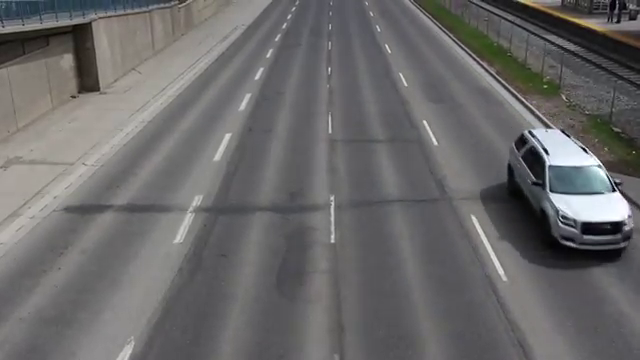

In [ ]:
pil_image

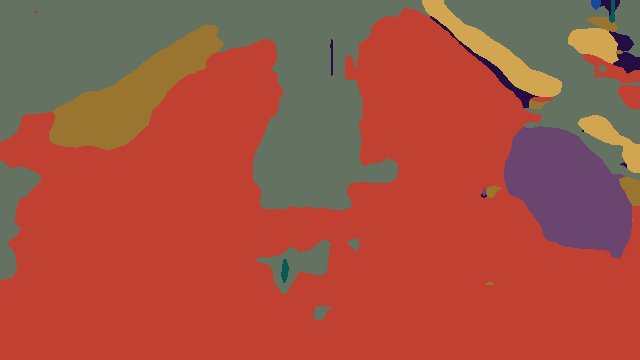

In [ ]:
rgb_image

In [ ]:
type(transform(rgb_image))

torch.Tensor

In [ ]:
type(output_predictions)

numpy.ndarray

In [ ]:
torchvision.utils.draw_segmentation_masks(transform(pil_image), transform(rgb_image))

ValueError: ignored

In [ ]:
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to a PIL image
    pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Apply transformation
    input_tensor = image_transform(pil_image)
    input_batch = input_tensor.unsqueeze(0).to(device)


    # Perform inference
    with torch.no_grad():
        output = fcn_model(input_batch)

    # Post-process the segmentation mask
    output_predictions = torch.argmax(output, dim=1).cpu().numpy()

    rgb_image = label_to_rgb(output_predictions.squeeze(), color_mapping)

    # Create a binary mask
    # segmentation_mask = np.zeros_like(output_predictions, dtype=np.uint8)
    # segmentation_mask[output_predictions == 13] = 255  # Assuming class 15 corresponds to the object of interest

    # # Apply the mask to the original frame
    # segmented_frame = cv2.bitwise_and(frame, frame, mask=rgb_image)

    # Display the segmented frame
    # cv2.imshow('Segmentation', output_predictions)
    out.write(np.array(rgb_image))

cap.release()
out.release()


error: ignored